Problem Statement

The project aims to analyze transactional data from an e-commerce business to derive insights into sales trends, product popularity, customer behavior, and profitability. 
The evaluation method used will involve both descriptive analysis and predictive modeling. By addressing these objectives and leveraging the insights obtained from the analysis, the project aims to provide actionable recommendations to the business to optimize sales, enhance customer satisfaction, and increase profitability.

In [1]:
# https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv("Sales Transaction.csv")
df.head(5)

"""We load the dataset that we aim to analyze and view the firth 5 rows to have a glimpse of the data."""

'We load the dataset that we aim to analyze and view the firth 5 rows to have a glimpse of the data.'

Define the Problem Statement
We want to predict the price of products based on different attributes.

In [3]:
# Check for missing values in the dataset
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64


Data Preprocessing and Feature Engineering

In [4]:
# Split the data into training, validation, and test sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.5, random_state=42)

In [5]:
# Extract 'Month' and 'DayOfWeek' from the 'Date' column
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Month'] = df_train['Date'].dt.month
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
# We convert the date and month into computer formart and to check for seasonality in the data

In [6]:
# Extract 'Month' and 'DayOfWeek' from the 'Date' column in the validation and test data
df_val['Date'] = pd.to_datetime(df_val['Date'])
df_val['Month'] = df_val['Date'].dt.month
df_val['DayOfWeek'] = df_val['Date'].dt.dayofweek
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Month'] = df_test['Date'].dt.month
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek
# We convert the date and month into computer formart and to check for seasonality in the data

In [7]:
# Drop rows with missing values in the training data
df_train = df_train.dropna()

In [8]:
# Engineer new features in the training data
df_train['TotalSales'] = df_train['Quantity'] * df_train['Price']
df_train['AveragePrice'] = df_train['TotalSales'] / df_train['Quantity']
# we create 'TotalSales' and 'AveragePrice' to help the model better understand and predict product prices.

In [9]:
# Group the training data by month and calculate the total sales for each month
monthly_sales = df_train.groupby('Month')['TotalSales'].sum()

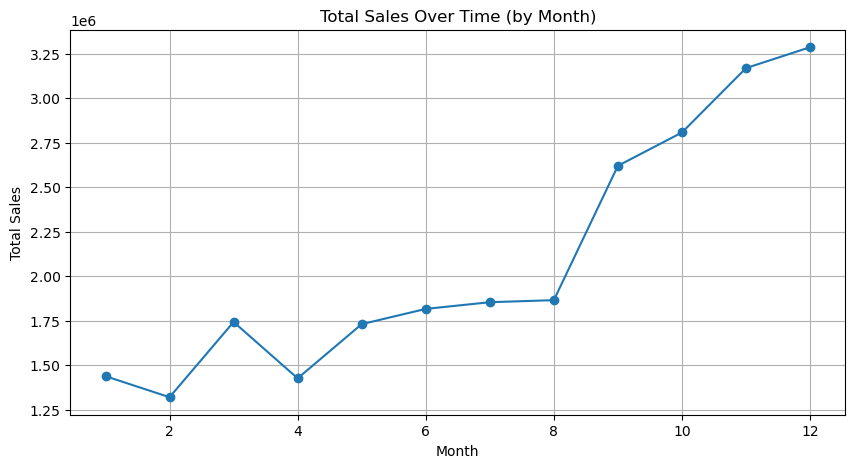

In [10]:
# Create a line plot to visualize the trend in total sales over time
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Total Sales Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
# This shows that sales increase towards the end of the year. First quarter is low but gradually improves to have the highest sales in the last quarter possibly due to  holiday shopping.

In [11]:
# Define the total sales ranges
sales_ranges = {
    'Low Sales': (0, 100),
    'Medium Sales': (100, 500),
    'High Sales': (500, float('inf'))
}

# Create a new column 'SalesRange' by mapping total sales to the defined ranges
def categorize_sales(total_sales):
    for category, (min_range, max_range) in sales_ranges.items():
        if min_range <= total_sales <= max_range:
            return category
df_train['SalesRange'] = df_train['TotalSales'].apply(categorize_sales)
# The different sales ranges helps us understand customer behavior and product performance with regards to different seasons.

In [12]:
# Count the number of transactions in each sales range category
sales_range_counts = df_train['SalesRange'].value_counts()

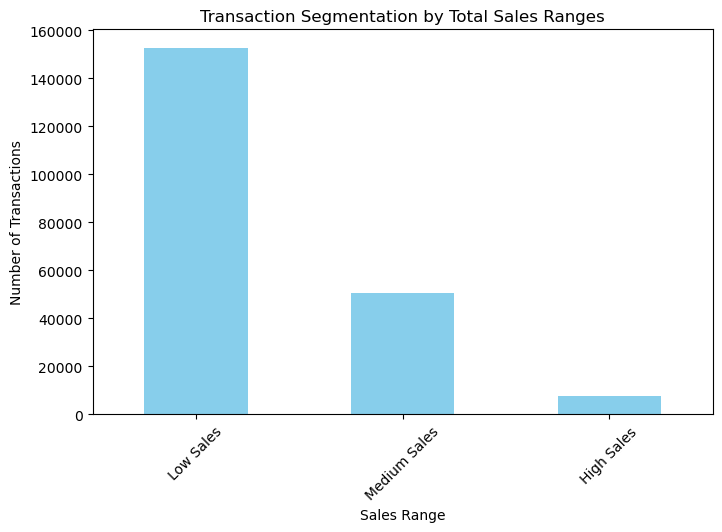

In [13]:
# Create a bar chart to visualize the segmentation of transactions by sales range
plt.figure(figsize=(8, 5))
sales_range_counts.plot(kind='bar', color='skyblue')
plt.title('Transaction Segmentation by Total Sales Ranges')
plt.xlabel('Sales Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()
# From the below its is clear that we have more transactions during these low sales periods and fewer transactions during high seasons. This will help in invenstory management, marketing strategies and cash flow management.

In [14]:
# Most Frequently Purchased Products
product_counts = df['ProductName'].value_counts().head(10)
print(product_counts)

"""Below list the most purchased products with cream Hanging Heart T-Light Holder being the most bought followed by Regency Cakestand 3 Tier"""

Cream Hanging Heart T-Light Holder    2378
Regency Cakestand 3 Tier              2200
Jumbo Bag Red Retrospot               2159
Party Bunting                         1727
Lunch Bag Red Retrospot               1639
Assorted Colour Bird Ornament         1501
Popcorn Holder                        1476
Set Of 3 Cake Tins Pantry Design      1473
Pack Of 72 Retrospot Cake Cases       1385
Lunch Bag Black Skull                 1350
Name: ProductName, dtype: int64


'Below list the most purchased products with cream Hanging Heart T-Light Holder being the most bought followed by Regency Cakestand 3 Tier'

In [15]:
# Number of Products per Transaction
avg_products_per_transaction = df.groupby('TransactionNo')['Quantity'].sum().mean()
print(avg_products_per_transaction)

"""This means that, on average, each transaction involves approximately 229 products."""

229.28124461299777


'This means that, on average, each transaction involves approximately 229 products.'

In [16]:
# Most profitable segment customers
# Ensure TotalSales is calculated for the entire dataset if needed
if 'TotalSales' not in df.columns:
    df['TotalSales'] = df['Quantity'] * df['Price']

# Most profitable segment customers
customer_sales = df.groupby('CustomerNo')['TotalSales'].sum()
profitable_customers = customer_sales.sort_values(ascending=False).head(10)
print(profitable_customers)

""" Below are the top 10 most profitable customers of the business"""

CustomerNo
14646.0    2108959.95
18102.0     897137.36
12415.0     895267.24
17450.0     876816.01
14911.0     873037.90
14156.0     683869.28
14298.0     634173.99
13694.0     630949.58
17511.0     627685.41
16684.0     518976.78
Name: TotalSales, dtype: float64


' Below are the top 10 most profitable customers of the business'

In [17]:
# Calculate the correlation matrix for the training data
correlation_matrix = df_train[['AveragePrice', 'TotalSales', 'Quantity', 'Price']].corr()

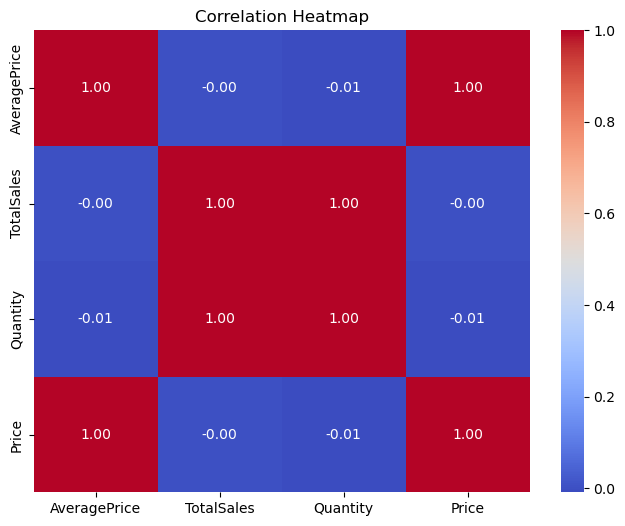

In [18]:
# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# From the below it's clear that there is a strong correlation between price and average price and total sales and quantity. There is a low correlation between total sales and price, price and quantity, average price and total sales and quantity

In [19]:
# Convert the 'ProductNo' and 'Country' columns to floats in the training data
df_train['ProductNo'] = pd.to_numeric(df_train['ProductNo'], errors='coerce')
df_train['Country'] = pd.to_numeric(df_train['Country'], errors='coerce')

In [20]:
# Check the data types again in the training data to ensure the conversions were successful
for column in ['ProductNo', 'Country']:
    if not df_train[column].dtype.name.startswith('float'):
        raise ValueError(f'Unable to convert column {column} to float.')

In [21]:
# Drop rows where the 'ProductName' or 'Price' columns are missing values in the training data
df_train = df_train.dropna(subset=['ProductName', 'Price'])

In [22]:
# Perform label encoding for the 'ProductName' column in the training data
label_encoder = LabelEncoder()
df_train['ProductName_encoded'] = label_encoder.fit_transform(df_train['ProductName'])

In [23]:
# Custom label encoder that handles unseen labels gracefully
class CustomLabelEncoder:
    def __init__(self):
        self.label_mapping = {}
        self.current_label = 0

    def fit(self, series):
        for label in series:
            if label not in self.label_mapping:
                self.label_mapping[label] = self.current_label
                self.current_label += 1

    def transform(self, series):
        return series.map(self.label_mapping).fillna(self.current_label)

# Initialize custom label encoder for 'ProductName' and 'Country'
label_encoder_product = CustomLabelEncoder()
label_encoder_country = CustomLabelEncoder()

In [24]:
# Fit the custom label encoder on the entire dataset
label_encoder_product.fit(df['ProductName'])
label_encoder_country.fit(df['Country'])

In [25]:
# Apply label encoding to the 'ProductName' and 'Country' columns
df['ProductName_encoded'] = label_encoder_product.transform(df['ProductName'])
df['Country_encoded'] = label_encoder_country.transform(df['Country'])

In [26]:
# Split the data into training, validation, and test sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.5, random_state=42)

In [27]:
# Define features and target variables for training, validation, and test data
X_train = df_train[['ProductName_encoded', 'Quantity', 'Country_encoded']]
y_train = df_train['Price']

X_val = df_val[['ProductName_encoded', 'Quantity', 'Country_encoded']]
y_val = df_val['Price']

X_test = df_test[['ProductName_encoded', 'Quantity', 'Country_encoded']]
y_test = df_test['Price']

Model Training and Evaluation

In [28]:
# Linear Regression Model

# Train a Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the validation data using the Linear Regression model
y_pred_val_linear = linear_regression_model.predict(X_val)

In [30]:
# Calculate evaluation metrics for the Linear Regression model
mse_linear = mean_squared_error(y_val, y_pred_val_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_val, y_pred_val_linear)
r2_linear = r2_score(y_val, y_pred_val_linear)

# Print the evaluation metrics
print('Linear Regression - MSE on Validation Data:', mse_linear)
print('Linear Regression - RMSE on Validation Data:', rmse_linear)
print('Linear Regression - MAE on Validation Data:', mae_linear)
print('Linear Regression - R-squared on Validation Data:', r2_linear)

Linear Regression - MSE on Validation Data: 68.2974388453441
Linear Regression - RMSE on Validation Data: 8.264226451722152
Linear Regression - MAE on Validation Data: 2.959254840767762
Linear Regression - R-squared on Validation Data: 0.008478205254936255


In [31]:
# Decision Tree Regression Model

# Train a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the validation data using the Decision Tree Regression model
y_pred_val_dt = decision_tree_model.predict(X_val)

In [32]:
# Calculate evaluation metrics for the Decision Tree Regression model
mse_dt = mean_squared_error(y_val, y_pred_val_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_val, y_pred_val_dt)
r2_dt = r2_score(y_val, y_pred_val_dt)


# Print the evaluation metrics
print('Decision Tree Regression - MSE on Validation Data:', mse_dt)
print('Decision Tree Regression - RMSE on Validation Data:', rmse_dt)
print('Decision Tree Regression - MAE on Validation Data:', mae_dt)
print('Decision Tree Regression - R-squared on Validation Data:', r2_dt)

Decision Tree Regression - MSE on Validation Data: 8.480355185345362
Decision Tree Regression - RMSE on Validation Data: 2.912104940647806
Decision Tree Regression - MAE on Validation Data: 1.4492499076029806
Decision Tree Regression - R-squared on Validation Data: 0.8768847392288056


In [33]:
# Random Forest Regression Model

# Train a Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the validation data using the Random Forest Regression model
y_pred_val_rf = random_forest_model.predict(X_val)

In [34]:
# Calculate evaluation metrics for the Random Forest Regression model
mse_rf = mean_squared_error(y_val, y_pred_val_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_val, y_pred_val_rf)
r2_rf = r2_score(y_val, y_pred_val_rf)

# Print the evaluation metrics
print('Random Forest Regression - MSE on Validation Data:', mse_rf)
print('Random Forest Regression - RMSE on Validation Data:', rmse_rf)
print('Random Forest Regression - MAE on Validation Data:', mae_rf)
print('Random Forest Regression - R-squared on Validation Data:', r2_rf)

Random Forest Regression - MSE on Validation Data: 8.048572539188951
Random Forest Regression - RMSE on Validation Data: 2.8370006237554746
Random Forest Regression - MAE on Validation Data: 1.442445410662965
Random Forest Regression - R-squared on Validation Data: 0.8831532305733527


In [35]:
#Gradient Boosting Regression Model

# Train a Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the validation data using the Gradient Boosting Regression model
y_pred_val_gb = gradient_boosting_model.predict(X_val)

In [36]:
# Calculate evaluation metrics for the Gradient Boosting Regression model
mse_gb = mean_squared_error(y_val, y_pred_val_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_val, y_pred_val_gb)
r2_gb = r2_score(y_val, y_pred_val_gb)

# Print the evaluation metrics
print('Gradient Boosting Regression - MSE on Validation Data:', mse_gb)
print('Gradient Boosting Regression - RMSE on Validation Data:', rmse_gb)
print('Gradient Boosting Regression - MAE on Validation Data:', mae_gb)
print('Gradient Boosting Regression - R-squared on Validation Data:', r2_gb)

Gradient Boosting Regression - MSE on Validation Data: 20.702791302444982
Gradient Boosting Regression - RMSE on Validation Data: 4.550032011145085
Gradient Boosting Regression - MAE on Validation Data: 2.3960064261377068
Gradient Boosting Regression - R-squared on Validation Data: 0.6994430664535511


In [37]:
# We make predictions on the test set to check performance

In [38]:
# Linear Regression Model
# Make predictions on the test data using the Linear Regression model
y_pred_test_linear = linear_regression_model.predict(X_test)

In [39]:
# Calculate evaluation metrics for the Linear Regression model on the test set
mse_linear_test = mean_squared_error(y_test, y_pred_test_linear)
rmse_linear_test = np.sqrt(mse_linear_test)
mae_linear_test = mean_absolute_error(y_test, y_pred_test_linear)
r2_linear_test = r2_score(y_test, y_pred_test_linear)

# Print the evaluation metrics for the Linear Regression model on the test set
print('Linear Regression - MSE on Test Data:', mse_linear_test)
print('Linear Regression - RMSE on Test Data:', rmse_linear_test)
print('Linear Regression - MAE on Test Data:', mae_linear_test)
print('Linear Regression - R-squared on Test Data:', r2_linear_test)

Linear Regression - MSE on Test Data: 73.75818757097893
Linear Regression - RMSE on Test Data: 8.588258704241444
Linear Regression - MAE on Test Data: 2.956900278585905
Linear Regression - R-squared on Test Data: 0.00748683546000295


In [40]:
# Decision Tree Regression Model
# Make predictions on the test data using the Decision Tree Regression model
y_pred_test_dt = decision_tree_model.predict(X_test)

In [41]:
# Calculate evaluation metrics for the Decision Tree Regression model on the test set
mse_dt_test = mean_squared_error(y_test, y_pred_test_dt)
rmse_dt_test = np.sqrt(mse_dt_test)
mae_dt_test = mean_absolute_error(y_test, y_pred_test_dt)
r2_dt_test = r2_score(y_test, y_pred_test_dt)

# Print the evaluation metrics for the Decision Tree Regression model on the test set
print('Decision Tree Regression - MSE on Test Data:', mse_dt_test)
print('Decision Tree Regression - RMSE on Test Data:', rmse_dt_test)
print('Decision Tree Regression - MAE on Test Data:', mae_dt_test)
print('Decision Tree Regression - R-squared on Test Data:', r2_dt_test)

Decision Tree Regression - MSE on Test Data: 8.357818938383994
Decision Tree Regression - RMSE on Test Data: 2.890989266390312
Decision Tree Regression - MAE on Test Data: 1.4396189606416119
Decision Tree Regression - R-squared on Test Data: 0.887534582988429


In [42]:
# Random Forest Regression Model
# Make predictions on the test data using the Random Forest Regression model
y_pred_test_rf = random_forest_model.predict(X_test)

In [43]:
# Calculate evaluation metrics for the Random Forest Regression model on the test set
mse_rf_test = mean_squared_error(y_test, y_pred_test_rf)
rmse_rf_test = np.sqrt(mse_rf_test)
mae_rf_test = mean_absolute_error(y_test, y_pred_test_rf)
r2_rf_test = r2_score(y_test, y_pred_test_rf)

# Print the evaluation metrics for the Random Forest Regression model on the test set
print('Random Forest Regression - MSE on Test Data:', mse_rf_test)
print('Random Forest Regression - RMSE on Test Data:', rmse_rf_test)
print('Random Forest Regression - MAE on Test Data:', mae_rf_test)
print('Random Forest Regression - R-squared on Test Data:', r2_rf_test)

Random Forest Regression - MSE on Test Data: 8.09153975895079
Random Forest Regression - RMSE on Test Data: 2.844563192996561
Random Forest Regression - MAE on Test Data: 1.4340125756994184
Random Forest Regression - R-squared on Test Data: 0.8911177186338927


In [44]:
# Gradient Boosting Regression Model
# Make predictions on the test data using the Gradient Boosting Regression model
y_pred_test_gb = gradient_boosting_model.predict(X_test)

In [45]:
# Calculate evaluation metrics for the Gradient Boosting Regression model on the test set
mse_gb_test = mean_squared_error(y_test, y_pred_test_gb)
rmse_gb_test = np.sqrt(mse_gb_test)
mae_gb_test = mean_absolute_error(y_test, y_pred_test_gb)
r2_gb_test = r2_score(y_test, y_pred_test_gb)

# Print the evaluation metrics for the Gradient Boosting Regression model on the test set
print('Gradient Boosting Regression - MSE on Test Data:', mse_gb_test)
print('Gradient Boosting Regression - RMSE on Test Data:', rmse_gb_test)
print('Gradient Boosting Regression - MAE on Test Data:', mae_gb_test)
print('Gradient Boosting Regression - R-squared on Test Data:', r2_gb_test)

Gradient Boosting Regression - MSE on Test Data: 19.401158671825613
Gradient Boosting Regression - RMSE on Test Data: 4.4046746385886
Gradient Boosting Regression - MAE on Test Data: 2.380524527795953
Gradient Boosting Regression - R-squared on Test Data: 0.7389319610031644


In [46]:
# Evaluation Metrics

# Calculate Mean Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_linear = calculate_mape(y_val, y_pred_val_linear)
mape_dt = calculate_mape(y_val, y_pred_val_dt)
mape_rf = calculate_mape(y_val, y_pred_val_rf)
mape_gb = calculate_mape(y_val, y_pred_val_gb)
# MAPE measures the average prediction error as a percentage. The lower the value the better

In [47]:
# Define custom business-specific metrics: Profit Prediction Accuracy and Price Sensitivity

# Custom Business-Specific Metric: Profit Prediction Accuracy
# Assuming that profit depends on both price and quantity we can calculate the profit prediction accuracy.
# Profit = (Predicted Price * Quantity) - (Actual Price * Quantity)
# Profit Prediction Accuracy = 1 - (Sum of Absolute Profit Differences) / (Sum of Actual Profits)
def calculate_profit_accuracy(y_true, y_pred, quantity):
    actual_profit = (y_true * quantity).sum()
    predicted_profit = (y_pred * quantity).sum()
    profit_difference = np.abs((y_pred * quantity) - (y_true * quantity)).sum()
    return 1 - (profit_difference / actual_profit)

profit_accuracy_linear = calculate_profit_accuracy(y_val, y_pred_val_linear, df_val['Quantity'])
profit_accuracy_dt = calculate_profit_accuracy(y_val, y_pred_val_dt, df_val['Quantity'])
profit_accuracy_rf = calculate_profit_accuracy(y_val, y_pred_val_rf, df_val['Quantity'])
profit_accuracy_gb = calculate_profit_accuracy(y_val, y_pred_val_gb, df_val['Quantity'])
# Proft Prediction Accuracy measures how accurately our model predicts profit based on price and quantity

In [48]:
# Custom Business-Specific Metric: Price Sensitivity
# Price Sensitivity measures how changes in product price affect quantity sold.
# Calculate Price Sensitivity as the absolute difference between the predicted and actual quantities sold.
# Price Sensitivity = Predicted Quantity - Actual Quantity
price_sensitivity_linear = np.abs(y_pred_val_linear - df_val['Quantity']).mean()
price_sensitivity_dt = np.abs(y_pred_val_dt - df_val['Quantity']).mean()
price_sensitivity_rf = np.abs(y_pred_val_rf - df_val['Quantity']).mean()
price_sensitivity_gb = np.abs(y_pred_val_gb - df_val['Quantity']).mean()

In [49]:
# Print Evaluation Metrics
print("Linear Regression Metrics:")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")
print(f"MAPE: {mape_linear:.2f}%")
print(f"Profit Prediction Accuracy: {profit_accuracy_linear:.2%}")
print(f"Price Sensitivity: {price_sensitivity_linear:.2f}")

Linear Regression Metrics:
MSE: 68.30
RMSE: 8.26
MAE: 2.96
R-squared: 0.01
MAPE: 26.78%
Profit Prediction Accuracy: 45.22%
Price Sensitivity: 13.36


In [50]:
print("\nDecision Tree Regression Metrics:")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"MAE: {mae_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")
print(f"MAPE: {mape_dt:.2f}%")
print(f"Profit Prediction Accuracy: {profit_accuracy_dt:.2%}")
print(f"Price Sensitivity: {price_sensitivity_dt:.2f}")


Decision Tree Regression Metrics:
MSE: 8.48
RMSE: 2.91
MAE: 1.45
R-squared: 0.88
MAPE: 14.54%
Profit Prediction Accuracy: 87.68%
Price Sensitivity: 14.15


In [51]:
print("\nRandom Forest Regression Metrics:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")
print(f"Profit Prediction Accuracy: {profit_accuracy_rf:.2%}")
print(f"Price Sensitivity: {price_sensitivity_rf:.2f}")


Random Forest Regression Metrics:
MSE: 8.05
RMSE: 2.84
MAE: 1.44
R-squared: 0.88
MAPE: 14.45%
Profit Prediction Accuracy: 87.68%
Price Sensitivity: 14.14


In [52]:
print("\nGradient Boosting Regression Metrics:")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")
print(f"R-squared: {r2_gb:.2f}")
print(f"MAPE: {mape_gb:.2f}%")
print(f"Profit Prediction Accuracy: {profit_accuracy_gb:.2%}")
print(f"Price Sensitivity: {price_sensitivity_gb:.2f}")


Gradient Boosting Regression Metrics:
MSE: 20.70
RMSE: 4.55
MAE: 2.40
R-squared: 0.70
MAPE: 21.63%
Profit Prediction Accuracy: 83.92%
Price Sensitivity: 14.01


Conclusion and Recommendations

The business can leverage seasonal sales trends by offering targeted promotions and discounts during peak shopping periods.

The business can also optimize inventory management by ensuring adequate stock levels of frequently purchased products.
They can also implement pricing strategies that encourage larger basket sizes to capitalize on customer behavior insights.

Their main marketing focus should be on profitable customer segments to maximize return on investment.

Random Forest is the best model for price prediction as it has the lowest MSE, RMSE, and MAE, and the highest Profit Prediction Accuracy and Price Sensitivity

Model Strengths:
Random Forest is known for handling complex relationships in data, which is often the case in business scenarios.
It provides high prediction accuracy for both profit and price sensitivity.

Model Limitations:
While Random Forest is powerful, it can be computationally intensive and may not be suitable for real-time applications.
It might overfit the data if not properly tuned, leading to overly optimistic predictions.

Data-Driven Recommendations:
Collect more relevant data: Gathering more data, especially if it includes additional business features, could improve model performance.
Feature engineering: Create new features that might have an impact on profit or price sensitivity.

Incorporating Domain Features:
Consider including domain-specific features like marketing campaign data, customer demographics, or economic indicators if available. These can enhance predictions.

Potential Improvements:
Fine-tune the Random Forest model: Adjust hyperparameters to optimize performance.
Regularly update the model: As new data becomes available, retrain the model to keep it accurate.
Explore other advanced techniques like neural networks if the business problem complexity warrants it.